<a href="https://colab.research.google.com/github/ivnattt/MathStudent-Data-Analysis/blob/main/0zerotopandas_course_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.utils.colab.set_colab_file_id('1kpUGDWgTwcfQ7Ej8Ae2gE__X1Rs5jf_X')

# Math Student Information Data

- This data is about some students enrolled in a maths program and some extra information surrounding their lives.

- Data was taken from Kaggle: [Math Student](https://www.kaggle.com/janiobachmann/math-students)

[Content
This is a dataset from the UCI datasets repository. This dataset contains the final scores of students at the end of a math programs with several features that might or might not impact the future outcome of these students.]

- The goal is to draw insights form this data as to what kind of people are more commonly found in such programs and if possible, what determines the performance of a student (getting a good/bad final grade). 

- However, this will be done keeping in mind that correlation is not the same as causation. A feature that seems to have a high correlation with final grade may or may not be directly affecting it.

- This analysis project was done as a part of a [course](http://zerotopandas.com) Data Analysis with Python: Zero to Pandas offered by Jovian.ml.


In [ ]:
project_name = "Tanvi_final_project" # change this

In [ ]:
!pip install jovian --upgrade -q

In [ ]:
import jovian

In [ ]:
jovian.commit(project=project_name)

[jovian] Detected Colab notebook...
[jovian] Please enter your API key ( from https://jovian.ml/ ):
API KEY: ··········
[jovian] Uploading colab notebook to Jovian...
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/tanvi-mathpal/tanvi-final-project


'https://jovian.ml/tanvi-mathpal/tanvi-final-project'

## Data Preparation and Cleaning

Firstly, opendatasets was installed to successfully access the stackoverflow dataset.

In [1]:
#import necessary libraries now
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="dark")
matplotlib.rcParams['font.size'] = 19
matplotlib.rcParams['figure.figsize'] = (7, 5)

In [2]:
from google.colab import files
uploaded = files.upload()

Saving MathStudent.csv to MathStudent.csv


In [40]:
student_dfs=pd.read_csv("MathStudent.csv")
student_df=student_dfs.copy()

In [15]:
student_df.describe()

,age,Medu,Fedu,studytime,failures,schoolsup,famsup,paid,activities,higher,internet,famrel,freetime,goout,Dalc,Walc,health,absences,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,2.035443,0.334177,0.129114,0.612658,0.458228,0.508861,0.949367,0.832911,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.415190
std,1.276043,1.094735,1.088201,0.839240,0.743651,0.335751,0.487761,0.498884,0.500555,0.219525,0.373528,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,4.581443
min,15.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000
50%,17.000000,3.000000,2.000000,2.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,20.000000


In [42]:
student_df.drop(['school', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'guardian', 'traveltime', 'nursery', 'romantic', 'G1' , 'G2'], axis=1, inplace=True)

In [16]:
student_df.head()

,sex,age,address,Medu,Fedu,reason,studytime,failures,schoolsup,famsup,paid,activities,higher,internet,famrel,freetime,goout,Dalc,Walc,health,absences,G3
0,F,18,U,4,4,course,2,0,1,0,0,0,1,0,4,3,4,1,1,3,6,6
1,F,17,U,1,1,course,2,0,0,1,0,0,1,1,5,3,3,1,1,3,4,6
2,F,15,U,1,1,other,2,3,1,0,1,0,1,1,4,3,2,2,3,3,10,10
3,F,15,U,4,2,home,3,0,0,1,1,1,1,1,3,2,2,1,1,5,2,15
4,F,16,U,3,3,home,2,0,0,1,1,0,1,0,4,3,2,1,2,5,4,10


In [ ]:
student_df.shape

(395, 22)

In [ ]:
print(project_name)

Tanvi_final_project


## Exploratory Analysis and Visualization

1. Replace binary answers like "yes" and "no" to 1 and 0.
2. Visualise population divided on the basis of gender  and background.
3. Reasons for joining course
4. Visualise distribuion of age in population.

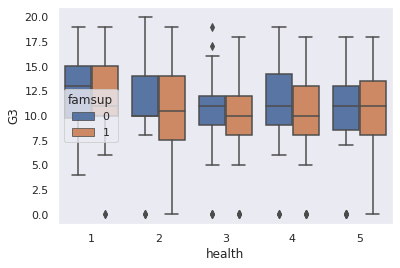

In [51]:
sns.boxplot(x="health", y='G3', hue="famsup", data=student_df)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


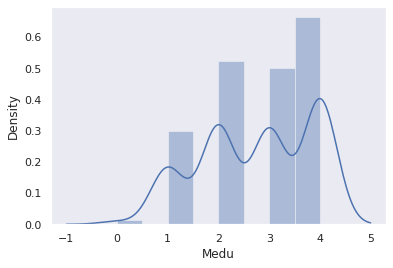

In [49]:
sns.distplot(student_df['Medu'])

In [41]:
#Turning binary answers in string to ones and zeros for easy interpretation

student_df['schoolsup'].replace({'yes': 1, 'no': 0}, inplace=True)
student_df['famsup'].replace({'yes': 1, 'no': 0}, inplace=True)
student_df['paid'].replace({'yes': 1, 'no': 0}, inplace=True)
student_df['activities'].replace({'yes': 1, 'no': 0}, inplace=True)
student_df['higher'].replace({'yes': 1, 'no': 0}, inplace=True)
student_df['internet'].replace({'yes': 1, 'no': 0}, inplace=True)

Male-Female population in data:

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

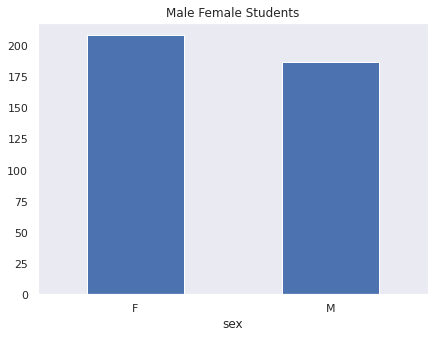

In [ ]:
student_df.groupby('sex').size().plot(kind="bar", title="Male Female Students")
plt.xticks(rotation=360)

Number of female students is higher.

Urban-Rural population in data:

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

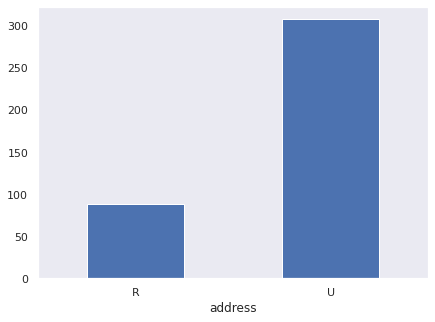

In [ ]:
student_df.groupby('address').size().plot(kind="bar")
plt.xticks(rotation=360)

There are lot more students coming from an urban background as compared to those from rural background.

Reasons for choosing the present school : 

- 'course' preference 

- close to 'home' 

- school 'reputation' 

- 'other' reason

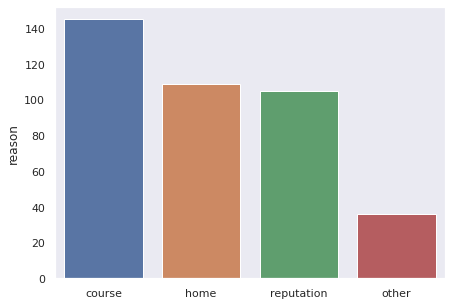

In [ ]:
reason=student_df.reason.value_counts()
plt.xticks(rotation=360)
sns.barplot(x=reason.index, y=reason)

Most of the students chose to get into the school they are in because of the course offered. Then, nearly equal number chose because of proximity from home and reputation of school.

Distribution of age in  pupulation.

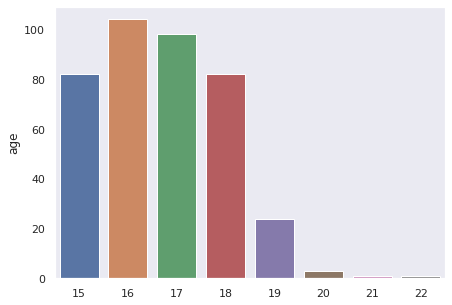

In [ ]:
reason=student_df.age.value_counts()
plt.xticks(rotation=360)
sns.barplot(x=reason.index, y=reason)

Most lie between 15 to 18 years of age. There is a considerable number in age '19' but the number falls drastically after that.

Studying the correlation of alcohol and activities on health.

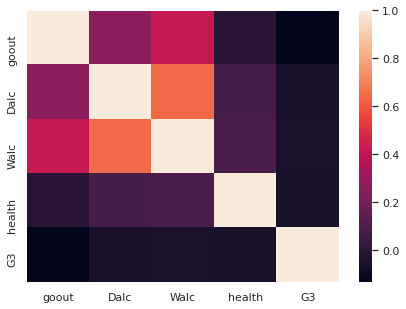

In [ ]:
sns.heatmap(student_df[['goout', 'Dalc','Walc', 'health', 'G3']].corr())

## Asking and Answering Questions

TODO:
Answering the follwing questions -

- How does male-female ratio differ based on urban and rural background?
- How many get financial support?
- Amongst the ones that do have financial support, does urban or rural background affect the source of their financial support (School support vs Family support)?
- Does education of parents in some way determine student's performance?
- Do extra classes (paid) help?

## **How does male-female ratio differ based on urban and rural background?**

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7ae01c4ef0>],
      dtype=object)

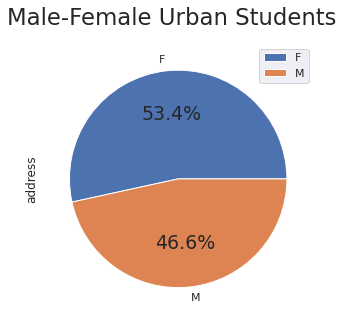

In [ ]:
student_copy = student_df[['sex','address']].copy()
urban=student_copy.loc[student_df['address']=='U']
urban=urban.groupby('sex').count()

rural=student_copy.loc[student_df['address']=='R']
rural=rural.groupby('sex').count()

urban.plot(kind='pie', subplots=True, title='Male-Female Urban Students', autopct='%1.1f%%')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7ae0190908>],
      dtype=object)

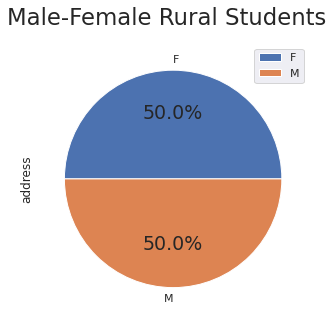

In [ ]:
rural.plot(kind='pie',subplots=True, title='Male-Female Rural Students', autopct='%1.1f%%')

This representation suggests that somehow there is more female representation amongst students coming from an urban background (as is the case in general population of this student data taken at the same time). 

However, the male-female ratio of students from the rural background isn't bad either, it is equal!

## **How many get financial support?**

In [ ]:
#Students getting BOTH family support and school support

have_both=len(student_df.loc[student_df['famsup']==1 ].loc[student_df['schoolsup']==1 ])
print('>>', have_both, 'students have BOTH family support and school support.\n')

students_with_financial_support=len(student_df.loc[student_df['famsup']==1]) + len(student_df.loc[student_df['schoolsup']==1]) - have_both
print('>>', students_with_financial_support, 'students have family support and/or school support.\n')

#Students with no financial support whatsoever
no_support=len(student_df)-students_with_financial_support
print('>>', no_support, 'have no financial support.')

>> 38 students have BOTH family support and school support.

>> 255 students have family support and/or school support.

>> 140 have no financial support.


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7adfbf1dd8>],
      dtype=object)

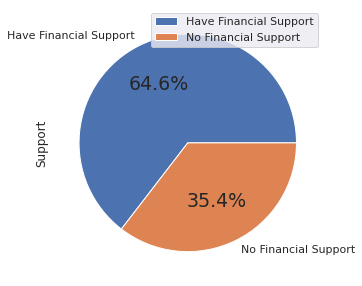

In [ ]:
x=pd.DataFrame({'Support':[students_with_financial_support, no_support]},index=['Have Financial Support', 'No Financial Support'])
x.plot(kind='pie',y='Support', subplots=True, title='', autopct='%1.1f%%')

As mentioned above, out of 395 students, 140 have no financial support at all. 

This section of student population is about 35%, and the rest have some sort of financial backing; either from school or from family.



## **Amongst the ones that *do* have financial support, does urban or rural background affect the source of their financial support (School support vs Family support)?**

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7adffa0e10>],
      dtype=object)

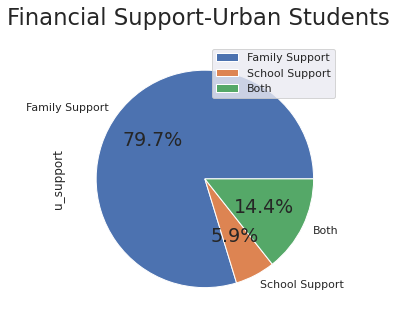

In [ ]:
student_copy1 = student_df[['famsup','address', 'schoolsup']].copy()
urban=student_copy1.loc[student_copy1['address']=='U']

urban_family=urban.loc[student_df['famsup']==1 ].loc[student_df['schoolsup']==0 ]
urban_school=urban.loc[student_df['famsup']==0 ].loc[student_df['schoolsup']==1 ]
urban_both=urban.loc[student_df['famsup']==1 ].loc[student_df['schoolsup']==1 ]
urban_support=pd.DataFrame({'u_support':[len(urban_family), len(urban_school), len(urban_both)]}, index=['Family Support', 'School Support', 'Both'])

student_copy2 = student_df[['famsup','address','schoolsup']].copy()
rural=student_copy2.loc[student_copy1['address']=='R']
rural_family=rural.loc[student_df['famsup']==1 ].loc[student_df['schoolsup']==0 ]
rural_school=rural.loc[student_df['famsup']==0 ].loc[student_df['schoolsup']==1 ]
rural_both=rural.loc[student_df['famsup']==1 ].loc[student_df['schoolsup']==1 ]
rural_support=pd.DataFrame({'r_support':[len(rural_family), len(rural_school), len(rural_both)]}, index=['Family Support', 'School Support', 'Both'])

urban_support.plot(kind='pie', y='u_support', subplots=True, title='Financial Support-Urban Students', autopct='%1.1f%%')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7adff90748>],
      dtype=object)

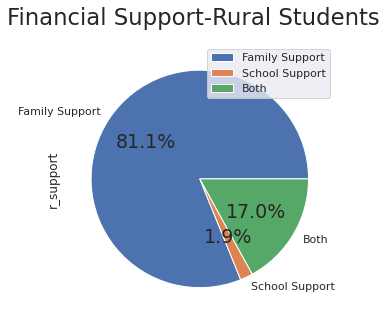

In [ ]:
rural_support.plot(kind='pie', y='r_support', subplots=True, title='Financial Support-Rural Students', autopct='%1.1f%%')

Conclusions:
1. Urban students getting financial support from school are a little higher in number than rural students. 

2. Majority of students who have financial support, irrespective of background, are getting it from their families. 

3. Number of students getting financial support from both family and school are more in rural background student population.

## **Does education of parents in some way determine student's performance?**





In [ ]:
student_df[['Medu', 'Fedu','failures','activities',  'G3']].corr()

,Medu,Fedu,failures,activities,G3
Medu,1.000000,0.623455,-0.236680,0.108277,0.217147
Fedu,0.623455,1.000000,-0.250408,0.112643,0.152457
failures,-0.236680,-0.250408,1.000000,-0.069341,-0.360415
activities,0.108277,0.112643,-0.069341,1.000000,0.016100
G3,0.217147,0.152457,-0.360415,0.016100,1.000000


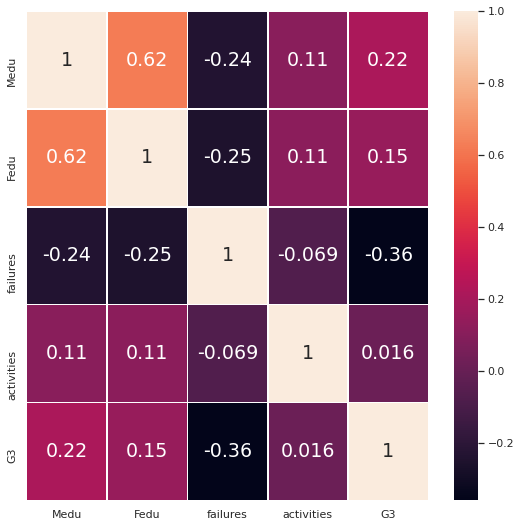

In [ ]:
#For visualisation 
fig, ax = plt.subplots(figsize=(9,9))
sns.heatmap(student_df[['Medu', 'Fedu','failures','activities',  'G3']].corr(), annot=True, linewidths=.5, ax=ax)

Conclusion:
1. Mother's and father's education has an equally (although small) negative correlation with failures. Which means that in this data, students whose parents are more educated, have less number of failures (academically).

2. Mother's and father's education have a high positive correlation with each other which means if one parent is educated, there's a high chance the other parent is too.

3. Parent's education level also has a positive correlation to final grades. One can say students with higher grades were found to have more educated parents.

## **Do extra classes (paid) help?**
For reference: **paid** - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text major ticklabel objects>)

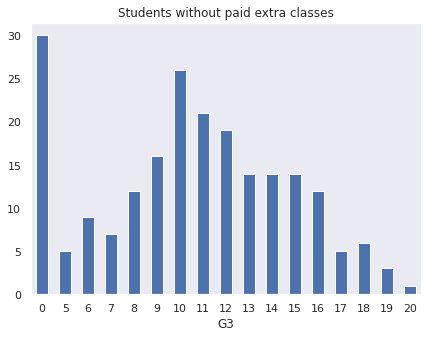

In [ ]:
student_not_paid=student_df.loc[student_df['paid']==0]

student_not_paid.groupby('G3').size().plot(kind="bar", title='Students without paid extra classes')
plt.xticks(rotation=360)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text major ticklabel objects>)

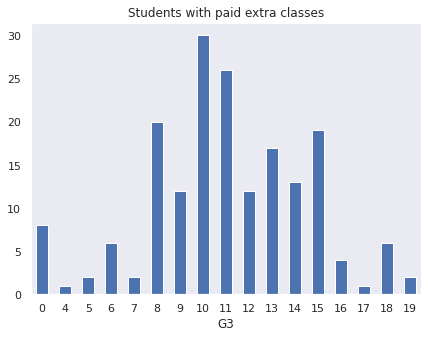

In [ ]:
student_paid=student_df.loc[student_df['paid']==1]

student_paid.groupby('G3').size().plot(kind="bar", title='Students with paid extra classes')
plt.xticks(rotation=360)

The two graphs showing distribution of final grades have been drawn after grouping the student population into two based on whether or not they have a [paid] extra class or not.

The graph showing grades of students without paid extra classes:
- has a lot of students with grade zero
- has a more uniform distribution of population

The graph showing students with paid extra classes:
- has lesser number of students getting zero
- grades of most of the population lies between 8-15



## Inferences and Conclusion

- Most lie between 15 to 18 years of age.

- Most of the students chose to get into the school they are in because of the course offered. Then, nearly equal number chose because of proximity from home and reputation of school.

- There are lot more students coming from an urban background as compared to those from rural background.
- Number of female students is higher.

- There is more female representation amongst students coming from an urban background (as is the case in general population of this student data taken at the same time).

- In this data, about 35% have no financial support at all. The rest have some sort of financial backing; either from school or from family.

- Majority of students who have financial support, irrespective of background, are getting it from their families.
Number of students getting financial support from both family and school are more in rural background student population.
Urban students getting financial support from school are a little higher in number than rural students.

- In this data, students whose parents are more educated, have less number of failures (academically). Also, students with higher grades were found to have more educated parents.

- Mother's and father's education have a high positive correlation with each other which means if one parent is educated, there's a high chance the other parent is too.

- A lot of students who did not have extra paid classes had zero as their final score. Also, such students had a very unifrom distribution of grade frequency.


In [ ]:
import jovian

In [ ]:
jovian.commit(project='my-project')

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/tanvi-mathpal/my-project


'https://jovian.ml/tanvi-mathpal/my-project'